In [382]:
%pip install pandas statsmodels seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [383]:
# インポート
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [384]:
# JSONLファイルのパス
jsonl_file_path = './data/listings_2024_sales.json'  # ご自身のファイルパスに置き換えてください

# データをDataFrameに変換
df = pd.read_json(jsonl_file_path, lines=True)


In [385]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,stay_operation_type,prefecture_name,city_name,floor_plan,sqm,number_of_capacity,...,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,住宿,東京都,渋谷区,1R,19.00,2,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8072.677748,12576.291667,6528.581548
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,特区民泊,大阪府,大阪市港区,1DK,27.00,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5595.319149,5883.578947,5000.000000
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,住宿,東京都,大田区,1K,25.99,4,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8341.010638,11029.804054,6595.653509
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,住宿,東京都,墨田区,1K,37.24,5,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,8459.772487,13115.636364,7268.737542
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,住宿,東京都,新宿区,1R,18.55,3,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,8288.753623,10153.216216,6132.968750


In [386]:
# 統計情報

df.describe()

,sqm,number_of_capacity,location_floor,built_year,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
count,1599.000000,1599.000000,1551.000000,1598.000000,31.000000,64.000000,171.000000,1.0,2.0,31.000000,50.000000,1599.000000,1599.000000,1599.000000
mean,27.255066,3.255159,3.703417,2014.397372,1.483871,1.375000,1.105263,1.0,1.0,1.322581,1.040000,9569.396606,11888.186557,7308.135433
std,11.365421,1.440496,2.160880,14.598030,0.676805,0.519462,0.447905,NaN,0.0,0.475191,0.197949,3948.880015,5857.820130,2631.249355
min,10.710000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,4917.394487,4734.975610,2105.238095
25%,20.130000,2.000000,2.000000,2014.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,7225.552140,8312.126603,5917.189347
50%,25.450000,3.000000,3.000000,2022.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,8565.012195,10755.725000,6738.402878
75%,30.180000,4.000000,5.000000,2023.000000,2.000000,2.000000,1.000000,1.0,1.0,2.000000,1.000000,10278.724820,13285.633784,7798.802494
max,106.100000,12.000000,19.000000,2024.000000,4.000000,3.000000,4.000000,1.0,1.0,2.000000,2.000000,45828.060000,67264.141593,31972.223350


In [387]:
# 欠損値の数
df.isnull().sum()


manual_id                 0
listing_name              0
room_type_id              0
owner_name                0
stay_operation_type       0
prefecture_name           0
city_name                 0
floor_plan                0
sqm                       0
number_of_capacity        0
has_elevator           1320
has_auto_lock          1325
first_line                1
first_station             1
first_walk_min            1
location_floor           48
built_year                1
tag                       0
number_of_s_beds       1568
number_of_sd_beds      1535
number_of_d_beds       1428
number_of_q_beds       1598
number_of_k_beds       1597
number_of_futons       1568
number_of_sofa_beds    1549
total_adr                 0
minpaku_adr               0
monthly_adr               0
dtype: int64

In [388]:
# ダミー変数の追加

df = pd.get_dummies(df, columns=[
    'stay_operation_type',
    'prefecture_name',
    'city_name',
    'floor_plan',
    'tag',
    'first_station',
    'first_line',
], drop_first=True)

df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_都営地下鉄大江戸線,first_line_都営大江戸線,first_line_都営大江戸線・東京メトロ副都心線,first_line_都営新宿線,first_line_都営浅草線,first_line_都電荒川線,first_line_阪急電鉄神戸線,first_line_阪神なんば線,first_line_阪神電鉄阪神なんば線,first_line_ＪＲ中央線
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,無,無,8,4.0,...,False,False,False,False,False,False,False,False,False,False
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,27.00,4,None,None,10,1.0,...,False,False,False,False,False,False,False,False,False,False
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,有,有,5,4.0,...,False,False,False,False,False,False,False,False,False,False
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,有,有,4,5.0,...,False,True,False,False,False,False,False,False,False,False
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,無,無,3,2.0,...,False,False,False,False,False,False,False,False,False,False


In [389]:
# 欠損値の処理

df['number_of_s_beds'].fillna(0, inplace=True)
df['number_of_sd_beds'].fillna(0, inplace=True)
df['number_of_d_beds'].fillna(0, inplace=True)
df['number_of_q_beds'].fillna(0, inplace=True)
df['number_of_k_beds'].fillna(0, inplace=True)
df['number_of_futons'].fillna(0, inplace=True)
df['number_of_sofa_beds'].fillna(0, inplace=True)

df['first_walk_min'] = pd.to_numeric(df['first_walk_min'], errors='coerce')

df['has_elevator'] = df['has_elevator'].map({'有': 1, '無': 0})
df['has_elevator'].fillna(0.5, inplace=True)

df['has_auto_lock'] = df['has_auto_lock'].map({'有': 1, '無': 0})
df['has_auto_lock'].fillna(0.5, inplace=True)

df = df.dropna()

df.isnull().sum()

/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_32423/10565926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_s_beds'].fillna(0, inplace=True)
/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_32423/10565926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

manual_id                0
listing_name             0
room_type_id             0
owner_name               0
sqm                      0
                        ..
first_line_都電荒川線         0
first_line_阪急電鉄神戸線       0
first_line_阪神なんば線        0
first_line_阪神電鉄阪神なんば線    0
first_line_ＪＲ中央線         0
Length: 265, dtype: int64

In [390]:
# built_yearは築年数に変換

df['built_year'] = 2024 - df['built_year']

In [391]:
# floor_planの変換

# 1Rから始まるものはfloor_plan_group_1Rにまとめる
df['floor_plan_group_1R'] = df[[column for column in df.columns if column.startswith('floor_plan_1R')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1R')], axis=1, inplace=True)

# floor_plan_1DK+Sとfloor_plan_1DKSはfloor_plan_1SDKにまとめる
df['floor_plan_1SDK'] = df[['floor_plan_1DKS', 'floor_plan_1DK+S', 'floor_plan_1DKS']].any(axis=1).astype(int)
df.drop(['floor_plan_1DK+S', 'floor_plan_1DKS'], axis=1, inplace=True)

# 1Kから始まるものはfloor_plan_group_1Kにまとめる
df['floor_plan_group_1K'] = df[[column for column in df.columns if column.startswith('floor_plan_1K')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1K')], axis=1, inplace=True)

# floor_plan_２LDKはfloor_plan_2LDKにまとめる
df['floor_plan_2LDK'] = df[['floor_plan_２LDK', 'floor_plan_2LDK']].any(axis=1).astype(int)
df.drop(['floor_plan_２LDK'], axis=1, inplace=True)

# データがないカラムを一部削除
df.drop(["floor_plan_4DK", "floor_plan_4LDK", "floor_plan_戸建"], axis=1, inplace=True)

In [392]:
# 寝具関連の変換

# number_of_sd_bedsは>0かどうかでbooleanに変換
df['has_sd_bed'] = (df['number_of_sd_beds'] > 0).astype(int)
df.drop('number_of_sd_beds', axis=1, inplace=True)

df['has_d_bed'] = (df['number_of_d_beds'] > 0).astype(int)
df.drop('number_of_d_beds', axis=1, inplace=True)

df['has_q_bed'] = (df['number_of_q_beds'] > 0).astype(int)
df.drop('number_of_q_beds', axis=1, inplace=True)

df['has_k_bed'] = (df['number_of_k_beds'] > 0).astype(int)
df.drop('number_of_k_beds', axis=1, inplace=True)

df['has_futon'] = (df['number_of_futons'] > 0).astype(int)
df.drop('number_of_futons', axis=1, inplace=True)

df['has_sofa_bed'] = (df['number_of_sofa_beds'] > 0).astype(int)
df.drop('number_of_sofa_beds', axis=1, inplace=True)

In [393]:
# city_nameを変換

# city_nameで始まるもののうち、city_name_大阪市から始まるものはまとめる: いずれかのcity_nameの部分がtrueならば、city_name_大阪市もtrue
df['city_name_大阪市'] = df[[col for col in df.columns if col.startswith('city_name_大阪市')]].any(axis=1)
df.drop([col for col in df.columns if col.startswith('city_name_大阪市') and col != 'city_name_大阪市'], axis=1, inplace=True)

df = df[df['prefecture_name_東京都'] == 1]

array([[<Axes: xlabel='sqm', ylabel='sqm'>,
        <Axes: xlabel='number_of_capacity', ylabel='sqm'>,
        <Axes: xlabel='has_elevator', ylabel='sqm'>,
        <Axes: xlabel='has_auto_lock', ylabel='sqm'>,
        <Axes: xlabel='first_walk_min', ylabel='sqm'>,
        <Axes: xlabel='built_year', ylabel='sqm'>,
        <Axes: xlabel='minpaku_adr', ylabel='sqm'>],
       [<Axes: xlabel='sqm', ylabel='number_of_capacity'>,
        <Axes: xlabel='number_of_capacity', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_elevator', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_auto_lock', ylabel='number_of_capacity'>,
        <Axes: xlabel='first_walk_min', ylabel='number_of_capacity'>,
        <Axes: xlabel='built_year', ylabel='number_of_capacity'>,
        <Axes: xlabel='minpaku_adr', ylabel='number_of_capacity'>],
       [<Axes: xlabel='sqm', ylabel='has_elevator'>,
        <Axes: xlabel='number_of_capacity', ylabel='has_elevator'>,
        <Axes: xlabel='has_elevator'

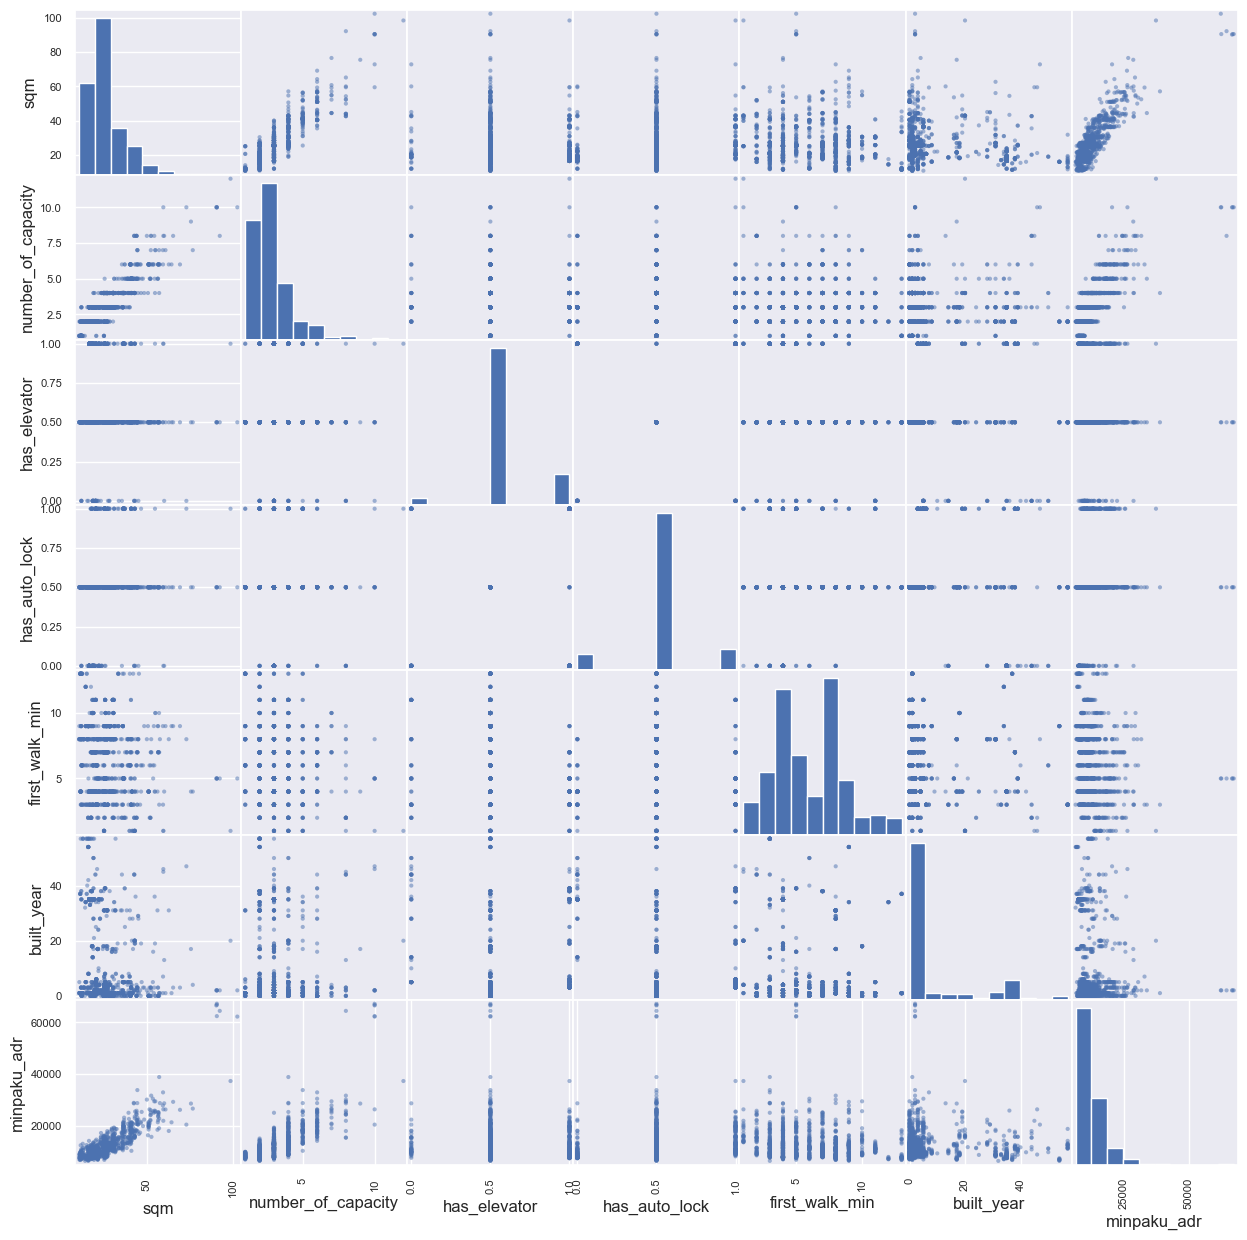

In [394]:
from pandas import plotting

plotting.scatter_matrix(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "built_year",
        "minpaku_adr",
    ]],
    figsize=(15, 15),
)

<Axes: >

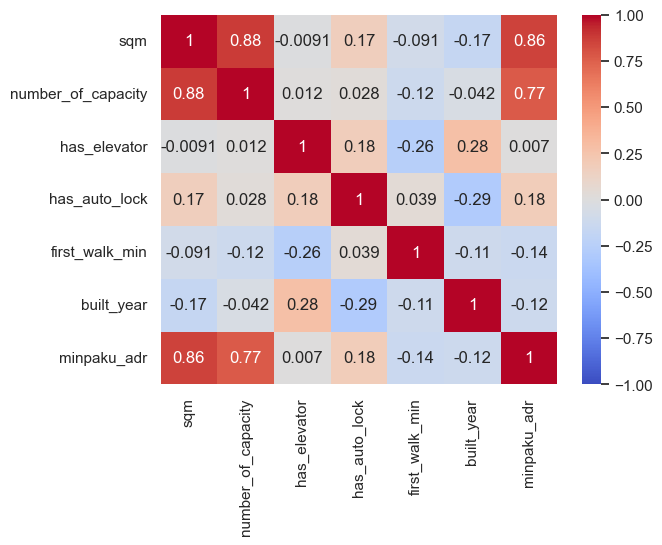

In [395]:
sns.heatmap(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "built_year",
        "minpaku_adr",
    ]].corr(),
    vmin=-1, annot=True, cmap='coolwarm')

In [396]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_ＪＲ中央線,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,city_name_大阪市
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,0.0,0.0,8.0,4.0,...,False,1,0,0,1,0,0,0,0,False
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,1.0,1.0,5.0,4.0,...,False,0,1,0,1,0,0,0,0,False
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,1.0,1.0,4.0,5.0,...,False,0,1,1,0,0,0,0,0,False
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,0.0,0.0,3.0,2.0,...,False,1,0,0,0,0,0,1,0,False
5,104-3,ヴィンテージデザイン神楽坂 201,b99f5f56-4263-4cc8-8096-8b379f1230ff,MT,18.55,3,0.0,0.0,3.0,2.0,...,False,1,0,0,0,0,0,1,0,False


In [397]:
# 統計情報

df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,total_adr,minpaku_adr,...,floor_plan_1SDK,floor_plan_2LDK,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,...,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,26.600391,3.137067,0.561533,0.511054,5.980840,3.564480,8.706706,0.033161,9823.481048,12382.025623,...,0.004422,0.032424,0.268239,0.394252,0.045689,0.113486,0.000737,0.000737,0.019897,0.030951
std,11.096376,1.364993,0.210548,0.216969,2.628062,2.086197,13.751569,0.242145,3879.504276,5713.303612,...,0.066372,0.177190,0.443206,0.488870,0.208887,0.317302,0.027146,0.027146,0.139697,0.173248
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4917.394487,6382.460674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.440000,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,7519.643357,8804.579545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.350000,3.000000,0.500000,0.500000,5.000000,3.000000,2.000000,0.000000,8885.598928,11160.066474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.080000,4.000000,0.500000,0.500000,8.000000,5.000000,6.000000,0.000000,10435.243697,13613.234899,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.400000,12.000000,1.000000,1.000000,13.000000,19.000000,57.000000,4.000000,45828.060000,67264.141593,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [398]:
# 説明変数の定義
features = [
    'number_of_capacity',
    'has_auto_lock',
    'first_walk_min',
]

features += [col for col in df.columns if col.startswith('stay_operation_type_')]

features += [col for col in df.columns if col.startswith('city_name_')]

X = df[features].astype(float)

features

['number_of_capacity',
 'has_auto_lock',
 'first_walk_min',
 'stay_operation_type_旅館業',
 'stay_operation_type_特区民泊',
 'city_name_世田谷区',
 'city_name_中野区',
 'city_name_北区',
 'city_name_台東区',
 'city_name_品川区',
 'city_name_墨田区',
 'city_name_大田区',
 'city_name_文京区',
 'city_name_新宿区',
 'city_name_杉並区',
 'city_name_板橋区',
 'city_name_江戸川区',
 'city_name_渋谷区',
 'city_name_港区',
 'city_name_葛飾区',
 'city_name_豊島区',
 'city_name_大阪市']

In [399]:
# 相関係数を確認
cor = df[features].corr()

cor


,number_of_capacity,has_auto_lock,first_walk_min,stay_operation_type_旅館業,stay_operation_type_特区民泊,city_name_世田谷区,city_name_中野区,city_name_北区,city_name_台東区,city_name_品川区,...,city_name_文京区,city_name_新宿区,city_name_杉並区,city_name_板橋区,city_name_江戸川区,city_name_渋谷区,city_name_港区,city_name_葛飾区,city_name_豊島区,city_name_大阪市
number_of_capacity,1.000000,0.028496,-0.117885,-0.002728,0.015403,-0.073412,-0.033577,-0.005969,0.051810,-0.004728,...,0.052013,-0.052502,0.048661,-0.055535,0.017174,-0.137890,0.205625,0.136587,-0.038324,NaN
has_auto_lock,0.028496,1.000000,0.039171,0.061220,-0.011431,-0.012671,-0.007398,0.041648,0.208097,-0.002399,...,-0.007920,-0.391650,0.034900,-0.003396,0.061220,0.064860,0.249195,0.061220,0.008891,NaN
first_walk_min,-0.117885,0.039171,1.000000,-0.020476,-0.052218,0.074889,-0.125230,0.013790,0.144576,-0.017574,...,0.041802,-0.377694,-0.076352,0.076588,-0.010139,0.306705,-0.083036,0.020872,0.225817,NaN
stay_operation_type_旅館業,-0.002728,0.061220,-0.020476,1.000000,-0.006091,-0.006752,-0.003942,-0.002966,-0.003059,-0.001278,...,-0.004220,-0.015548,-0.003405,-0.001810,-0.000737,-0.009393,0.124111,-0.000737,-0.008263,NaN
stay_operation_type_特区民泊,0.015403,-0.011431,-0.052218,-0.006091,1.000000,-0.055767,-0.032557,-0.024500,-0.025264,-0.010558,...,-0.034857,-0.128417,-0.028121,-0.014948,-0.006091,-0.077581,-0.049078,-0.006091,-0.068252,NaN
city_name_世田谷区,-0.073412,-0.012671,0.074889,-0.006752,-0.055767,1.000000,-0.036088,-0.027158,-0.028004,-0.011703,...,-0.038638,-0.142346,-0.031171,-0.016569,-0.006752,-0.085997,-0.054401,-0.006752,-0.075655,NaN
city_name_中野区,-0.033577,-0.007398,-0.125230,-0.003942,-0.032557,-0.036088,1.000000,-0.015855,-0.016349,-0.006832,...,-0.022557,-0.083102,-0.018198,-0.009673,-0.003942,-0.050205,-0.031760,-0.003942,-0.044168,NaN
city_name_北区,-0.005969,0.041648,0.013790,-0.002966,-0.024500,-0.027158,-0.015855,1.000000,-0.012303,-0.005142,...,-0.016975,-0.062538,-0.013695,-0.007279,-0.002966,-0.037781,-0.023900,-0.002966,-0.033238,NaN
city_name_台東区,0.051810,0.208097,0.144576,-0.003059,-0.025264,-0.028004,-0.016349,-0.012303,1.000000,-0.005302,...,-0.017504,-0.064487,-0.014121,-0.007506,-0.003059,-0.038959,-0.024645,-0.003059,-0.034274,NaN
city_name_品川区,-0.004728,-0.002399,-0.017574,-0.001278,-0.010558,-0.011703,-0.006832,-0.005142,-0.005302,1.000000,...,-0.007315,-0.026949,-0.005901,-0.003137,-0.001278,-0.016281,-0.010299,-0.001278,-0.014323,NaN


In [400]:
df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,total_adr,minpaku_adr,...,floor_plan_1SDK,floor_plan_2LDK,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,...,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,26.600391,3.137067,0.561533,0.511054,5.980840,3.564480,8.706706,0.033161,9823.481048,12382.025623,...,0.004422,0.032424,0.268239,0.394252,0.045689,0.113486,0.000737,0.000737,0.019897,0.030951
std,11.096376,1.364993,0.210548,0.216969,2.628062,2.086197,13.751569,0.242145,3879.504276,5713.303612,...,0.066372,0.177190,0.443206,0.488870,0.208887,0.317302,0.027146,0.027146,0.139697,0.173248
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4917.394487,6382.460674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.440000,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,7519.643357,8804.579545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.350000,3.000000,0.500000,0.500000,5.000000,3.000000,2.000000,0.000000,8885.598928,11160.066474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.080000,4.000000,0.500000,0.500000,8.000000,5.000000,6.000000,0.000000,10435.243697,13613.234899,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.400000,12.000000,1.000000,1.000000,13.000000,19.000000,57.000000,4.000000,45828.060000,67264.141593,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [401]:
# VIFの計算

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFの計算
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values('VIF', ascending=False)


/Users/ishibashi_y/workspace/rm-analyze-listingsales/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
1,has_auto_lock,8.315036
2,first_walk_min,8.145855
10,city_name_墨田区,7.347702
0,number_of_capacity,7.145222
13,city_name_新宿区,4.427034
17,city_name_渋谷区,4.011821
11,city_name_大田区,3.920033
20,city_name_豊島区,3.309830
18,city_name_港区,2.633828
5,city_name_世田谷区,2.296260


In [402]:
high_vif = vif_data[vif_data['VIF'] > 7]['feature']

X = X.drop(columns=high_vif)


print("VIFが7を超える変数:")
high_vif

VIFが7を超える変数:


0     number_of_capacity
1          has_auto_lock
2         first_walk_min
10         city_name_墨田区
Name: feature, dtype: object

In [403]:
# 特徴量とターゲットの選択
target = 'minpaku_adr'

X = X.astype(float)

y = df[target]

X = add_constant(X)

# 線形回帰モデルの構築
model = sm.OLS(y, X).fit()

model.summary()


/Users/ishibashi_y/workspace/rm-analyze-listingsales/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            minpaku_adr   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     28.78
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.70e-78
Time:                        15:44:02   Log-Likelihood:                -13452.
No. Observations:                1357   AIC:                         2.694e+04
Df Residuals:                    1339   BIC:                         2.703e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.275e+04    266.844     47.781      0.000    1.22e+04    1.33e+04
stay_operation_type_旅館業  -1.088e+04   4960.536     -2.194      0.028   -2.06e+04   -1153.391
stay_operation_type_特区民泊   139.9694    799.066      0.175      0.861   -1427.588    1707.527
city_name_世田谷区           -1553.7382    614.542     -2.528      0.012   -2759.309    -348.168
city_name_中野区            -1487.1821    967.393     -1.537      0.124   -3384.954     410.590
city_name_北区             -2237.6790   1258.703     -1.778      0.076   -4706.924     231.565
city_name_台東区             -134.5039   1222.835     -0.110      0.912   -2533.385    2264.377
city_name_品川区             -383.4286   2853.282     -0.134      0.893   -5980.818    5213.961
city_name_大田区            -4053.6144    580.733     -6.980      0.000   -5192.859   -2914.370
city_name_文京区             1188.5281    909.818      1.306      0.192    -596.297    2973.353
city_name_新宿区             -483.3878    378.781     -1.276      0.202   -1226.456     259.680
city_name_杉並区             -543.1542   1106.375     -0.491      0.624   -2713.570    1627.262
city_name_板橋区            -3891.2800   2026.379     -1.920      0.055   -7866.503      83.943
city_name_江戸川区           -3459.6922   4927.600     -0.702      0.483   -1.31e+04    6206.964
city_name_渋谷区               16.5074    488.028      0.034      0.973    -940.876     973.891
city_name_港区              1.175e+04    684.172     17.171      0.000    1.04e+04    1.31e+04
city_name_葛飾区             7672.8925   4927.600      1.557      0.120   -1993.764    1.73e+04
city_name_豊島区            -2071.0942    530.781     -3.902      0.000   -3112.346   -1029.842
city_name_大阪市                     0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1032.821   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28446.838
Skew:                           3.269   Prob(JB):                         0.00
Kurtosis:                      24.456   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [404]:
# Ridge回帰のR^2を計算

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("Ridge回帰の平均R²:", scores.mean())

Ridge回帰の平均R²: 0.23283904651855503
